In [23]:
import numpy as np

In [7]:
with open('DD_acc_results.txt', 'r') as file:
    fold_accuracy = file.readlines()
fold_accuracy

['0.7777777777777778\n',
 '0.811965811965812\n',
 '0.7435897435897436\n',
 '0.7777777777777778\n',
 '0.7350427350427351\n',
 '0.7264957264957265\n',
 '0.8290598290598291\n',
 '0.7863247863247863\n',
 '0.7863247863247863\n',
 '0.717948717948718\n']

In [32]:
import re

# Path to your text file
file_path = 'output.txt'

# Initialize the dictionary to store the data
data = {}

# Initialize variables to store the current fold and accuracy lists
current_fold = None
train_accuracies = []
test_accuracies = []

# Read the file and process it line by line
with open(file_path, 'r') as file:
    for line in file:
        # Check for the Namespace line to get the fold number
        fold_match = re.search(r'Namespace\(.*fold=(\d+),.*\)', line)
        if fold_match:
            # If we have already collected accuracies for a previous fold, save them
            if current_fold is not None:
                data[current_fold] = {
                    'train_accuracy': train_accuracies,
                    'test_accuracy': test_accuracies
                }
            # Reset for the new fold
            current_fold = int(fold_match.group(1))
            train_accuracies = []
            test_accuracies = []
        
        # Use regex to find the train accuracy in lines starting with 'average training of epoch'
        train_match = re.search(r'average training of epoch \d+:.*acc ([\d\.]+)', line)
        if train_match:
            train_accuracies.append(float(train_match.group(1)))
        
        # Use regex to find the test accuracy in lines starting with 'average test of epoch'
        test_match = re.search(r'average test of epoch \d+:.*acc ([\d\.]+)', line)
        if test_match:
            test_accuracies.append(float(test_match.group(1)))

# Save the last fold data
if current_fold is not None:
    data[current_fold] = {
        'train_accuracy': train_accuracies,
        'test_accuracy': test_accuracies
    }


train_best = 0
train_last = 0
test_best= 0
test_last = 0
# Print the extracted data
for fold, results in data.items():
    
    train_best += np.max(results['train_accuracy'])
    train_last += results['train_accuracy'][-1]
    test_best += np.max(results['test_accuracy'])
    test_last += results['test_accuracy'][-1]
    print(fold, results['train_accuracy'][-1], results['test_accuracy'][-1])
    print("    ", np.max(results['train_accuracy']), np.max(results['test_accuracy']))


train_best /= 10
train_last /= 10
test_best /= 10
test_last /= 10
print(train_best)
print(train_last)
print(test_best)
print(test_last)

1 0.778 0.77778
     0.782 0.77778
2 0.774 0.81197
     0.783 0.83761
3 0.775 0.74359
     0.788 0.76068
4 0.775 0.77778
     0.779 0.82051
5 0.775 0.73504
     0.784 0.76923
6 0.772 0.7265
     0.785 0.74359
7 0.765 0.82906
     0.773 0.83761
8 0.77 0.78632
     0.776 0.80342
9 0.77 0.78632
     0.78 0.78632
10 0.775 0.71795
     0.789 0.74359
0.7818999999999999
0.7728999999999999
0.788034
0.769231


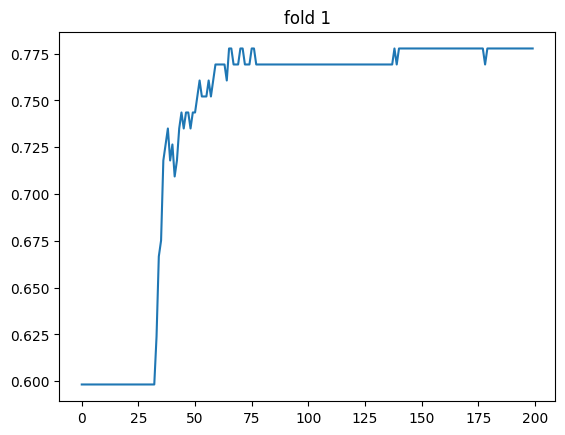

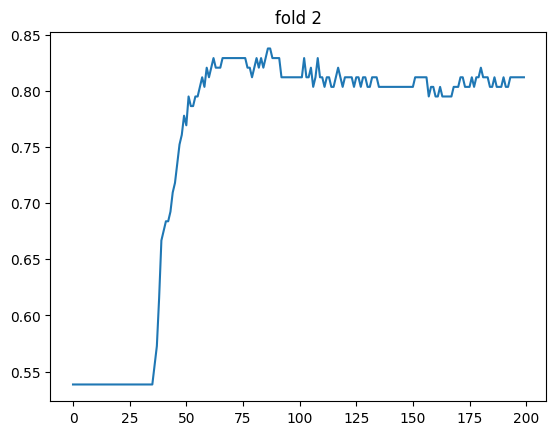

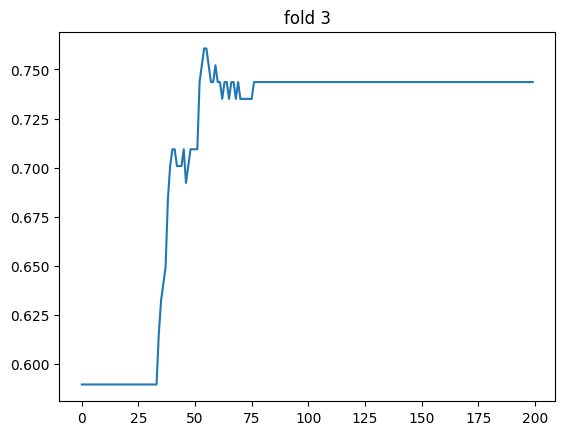

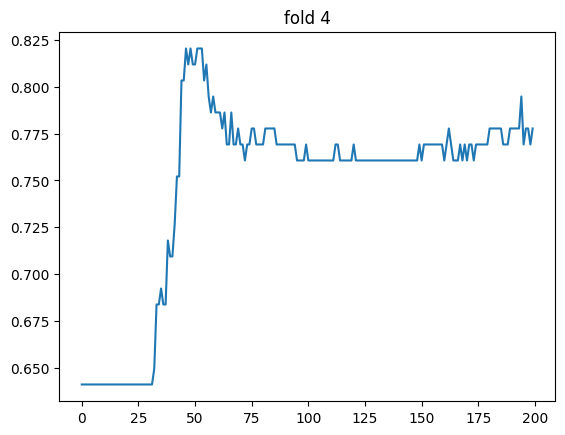

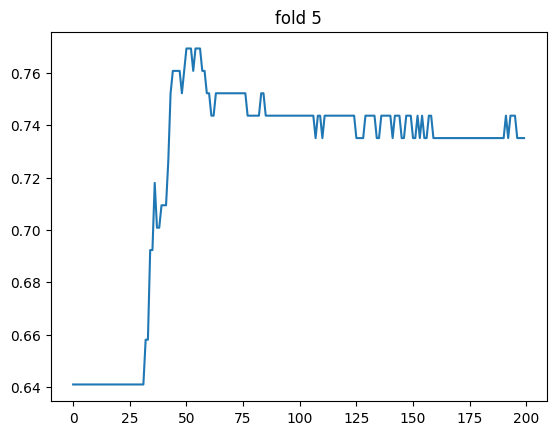

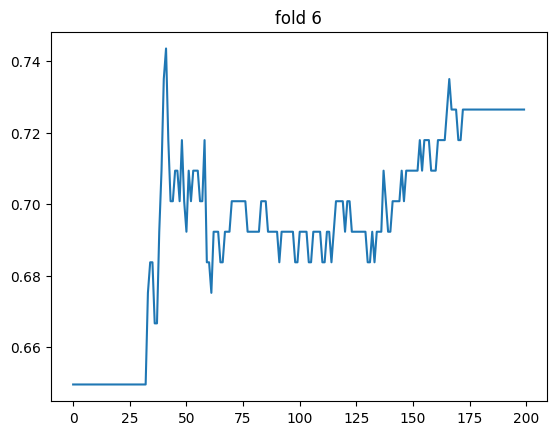

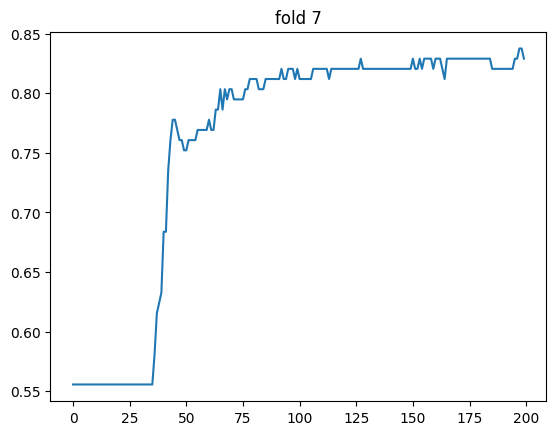

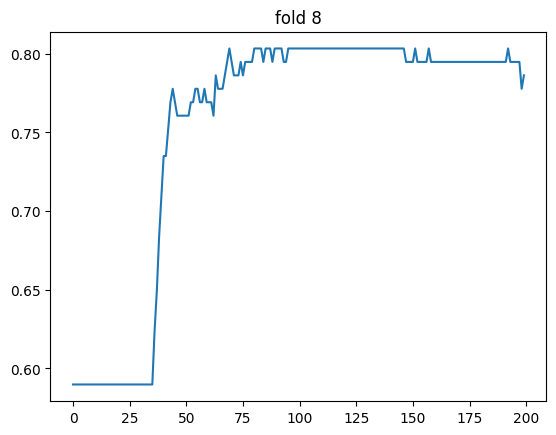

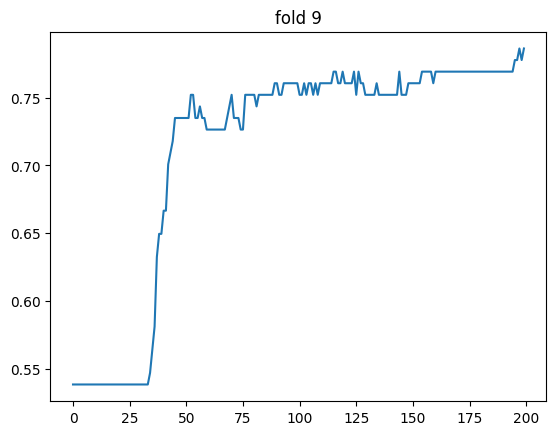

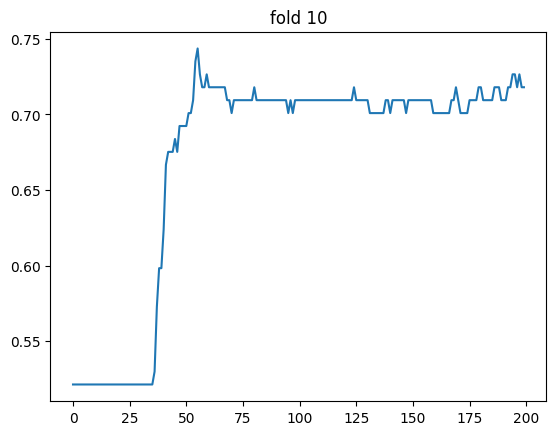

In [34]:
import matplotlib.pyplot as plt
x = []
y = []
for fold, results in data.items():
    field = 'test_accuracy'
    x.append(range(len(results[field])))
    y.append(results[field])
    

# x=[[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]]
# y=[[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]]  
for i in range(len(x)):
    plt.figure()
    plt.plot(x[i],y[i])
    plt.title(f"fold {i+1}")
    # Show/save figure as desired.
    plt.show()
# Can show all four figures at once by calling plt.show() here, outside the loop.
#plt.show()

The total running time is 2254 seconds.
The accuracy results for DD are as follows:
0.7777777777777778
0.811965811965812
0.7435897435897436
0.7777777777777778
0.7350427350427351
0.7264957264957265
0.8290598290598291
0.7863247863247863
0.7863247863247863
0.717948717948718
Average accuracy and std are
0.769231
0.0352402


In [ ]:
with open('output.txt', 'r') as file:
    results = file.readlines()
results

In [ ]:
lines_types = []
for line in results:
    # if line[:6] not in lines_types:
    #     lines_types.append(line[:6])
    if line[:6] != '\x1b[92ma':
        print(line)
lines_types